<a href="https://colab.research.google.com/github/proxi190/mlmed2024/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load in the datasets
train_df = pd.read_csv('/content/drive/My Drive/ECG/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/drive/My Drive/ECG/mitbih_test.csv', header=None)

# Display the first few rows of the training set and test set
train_df_head = train_df.head()
test_df_head = test_df.head()

print(train_df_head)
print(test_df_head)

#Split the dataset into features and labels (the last column will be used as labels)
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

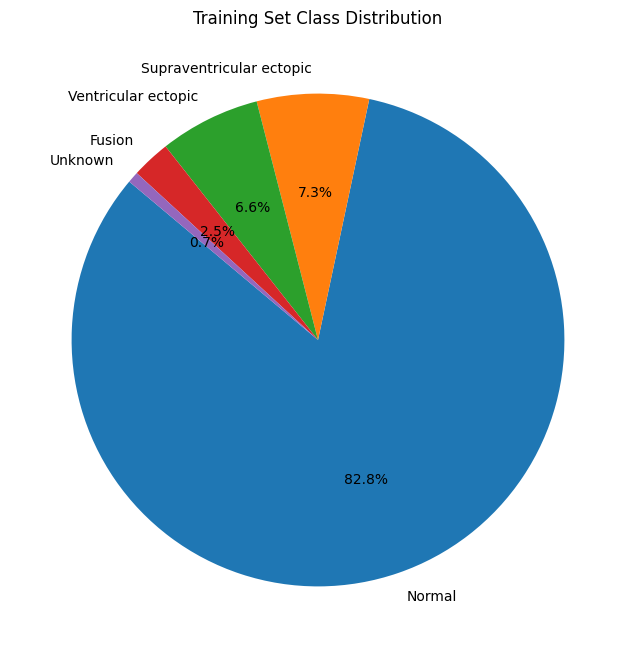

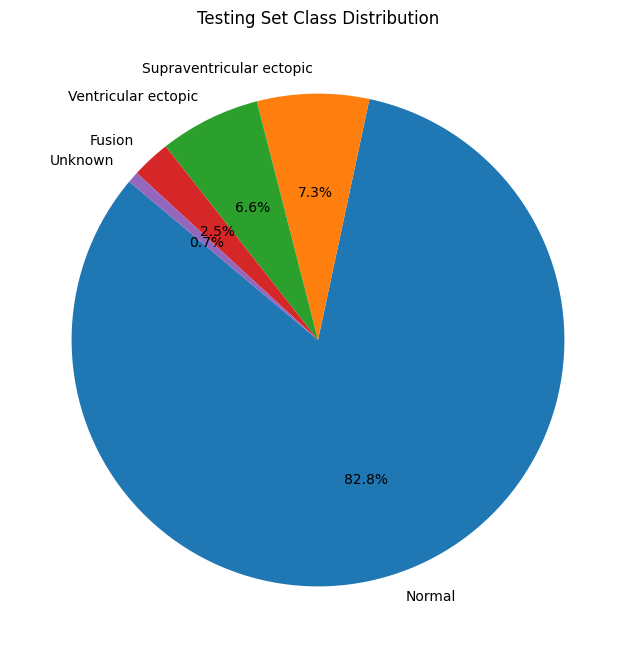

In [ ]:
import matplotlib.pyplot as plt

def class_distribution(df, title):
    class_counts = df.iloc[:, -1].value_counts()
    counts = class_counts.values

    # Plot the distribution
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=['Normal', 'Supraventricular ectopic', 'Ventricular ectopic', 'Fusion', 'Unknown'], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Assuming train_df and test_df are already loaded
class_distribution(train_df, 'Training Set Class Distribution')
class_distribution(test_df, 'Testing Set Class Distribution')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
input_shape = (X_train.shape[1], 1)  # Adjusting for Conv1D input
num_classes = y_train.shape[1]
print(input_shape, num_classes)

model = build_cnn_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(187, 1) 5


In [ ]:
#Since the model requires 3D input, we reshape the inputs
X_train = X_train.reshape((-1, X_train.shape[1], 1))
X_val = X_val.reshape((-1, X_val.shape[1], 1))
X_test = X_test.reshape((-1, X_test.shape[1], 1))

#Define a learning rate monitor for the training process
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [ ]:
#Begin training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[reduce_lr], verbose=1)

Epoch 1/20
1095/1095 [==============================] - 9s 5ms/step - loss: 0.2848 - accuracy: 0.9219 - val_loss: 0.1761 - val_accuracy: 0.9489 - lr: 1.0000e-04
Epoch 2/20
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1702 - accuracy: 0.9532 - val_loss: 0.1424 - val_accuracy: 0.9601 - lr: 1.0000e-04
Epoch 3/20
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1439 - accuracy: 0.9604 - val_loss: 0.1240 - val_accuracy: 0.9644 - lr: 1.0000e-04
Epoch 4/20
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1254 - accuracy: 0.9662 - val_loss: 0.1106 - val_accuracy: 0.9693 - lr: 1.0000e-04
Epoch 5/20
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1125 - accuracy: 0.9694 - val_loss: 0.1012 - val_accuracy: 0.9713 - lr: 1.0000e-04
Epoch 6/20
1095/1095 [==============================] - 5s 4ms/step - loss: 0.1008 - accuracy: 0.9721 - val_loss: 0.0938 - val_accuracy: 0.9736 - lr: 1.0000e-04
Epoch 7/20
1095/1095 [============

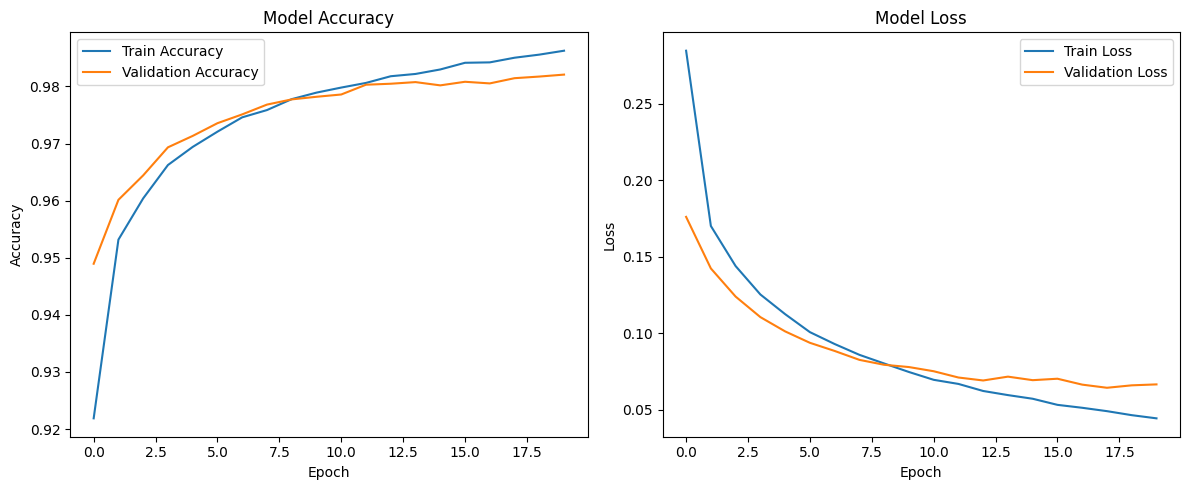

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

Test accuracy: 0.9802210927009583, Test loss: 0.07822053134441376


In [ ]:
import numpy as np
#Make predictions on the test set
predictions = model.predict(X_test, verbose=1)

#Convert probabilities to class predictions
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

685/685 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # 'macro' for unweighted mean per class, treating all classes equally
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9802210853279737
Precision: 0.9364034899278091
Recall: 0.8457052490856937
F1-Score: 0.8837224768541363


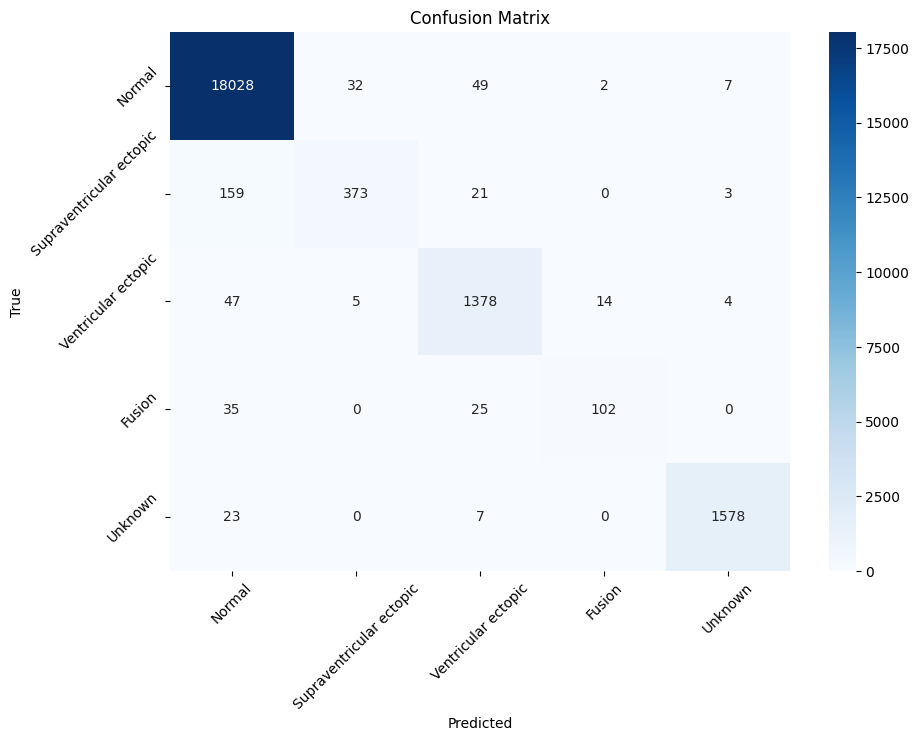

In [ ]:
labels = ['Normal', 'Supraventricular ectopic', 'Ventricular ectopic', 'Fusion', 'Unknown']

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()